## Embodied Cognition on Wikipedia: Page views Analysis

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
df = pd.read_csv('/Users/johnmadrid/Local/data/wiki_embodied_cognition.csv', delimiter=",", header=0, index_col=False)

# Converting date to a datestamp type
df["DateTime"] = pd.to_datetime(df["DateTime"])

# # Check for missing values
print(df.isnull().sum())

# Setting DateTime as index
df = df.set_index("DateTime")
# df.index

DateTime                  0
Embodied cognition[en]    0
Cognitive science[en]     0
Cognition[en]             0
dtype: int64


In [46]:
print(df.index.year)

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=5190)


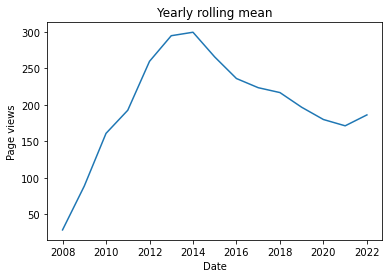

In [95]:
# select the month
df_month = df.index.month
df_year = df.index.year
# Moving averages per year (52 weeks window)
df_mean = df['Embodied cognition[en]'].groupby(df_year).mean()

ax = df_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")

plt.show()

In [312]:
views_before_project = df['2020-03-01':'2021-02-28']
views_during_project = df['2021-03-01':'2022-02-28']


# views_during_project
views_before_project_month = views_before_project.index.month
views_during_project_month = views_during_project.index.month

views_during_project_month
# views_during_project.tail(50)
#

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='DateTime', length=365)

In [320]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).sum()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).sum()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view = pd.DataFrame()

mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
mean_view.describe()

,Before,After
count,12.000000,12.000000
mean,5398.916667,5270.000000
std,916.436226,872.087986
min,3987.000000,3742.000000
25%,4943.000000,4666.000000
50%,5293.000000,5445.500000
75%,5967.500000,5873.000000
max,7114.000000,6388.000000


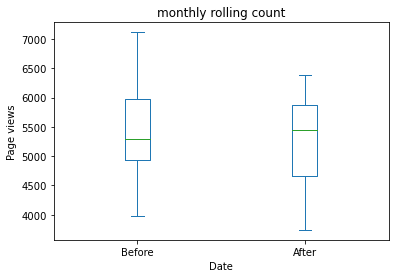

In [323]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

AttributeError: 'Series' object has no attribute 'set_xlabel'

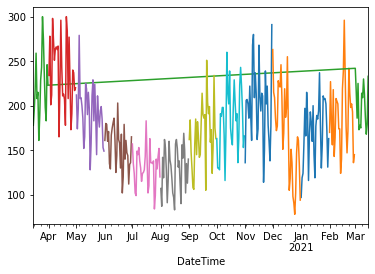

In [133]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = views_before_project_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()